# PCA

In this notebook, we explored the use of principal components analysis. We did not find it to be useful, so it is not used in any further work.

#### Import libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import os

#### Import dataset with null values filled

In [9]:
full=pd.read_csv("../../M2/carpentry/completeDF.csv")
full=full.loc[:,['CountryName', 'Year', 'Continent', 'Region1', 'ISO3'] + [x for x in full.columns[2:598]]]

#### Designating only the columns that have data (not "indicator", "short_name", "alpha2", "alpha3", "numeric_code", or "iso3166") as x then designating the country code and year as the y values. I then normalized the values using standardscaler before running a PCA to find the number of principal components required to explain 50% of variance.

In [11]:
full.iloc[:,5:]

,SPURBGROW,SPPOPAG25FEIN,SPPOPAG25MAIN,SPPOPDPND,SPPOPDPNDOL,SPPOPDPNDYG,SPPOPGROW,SPPOPTOTL,SPPOPTOTLFEIN,SPPOPTOTLFEZS,...,ENATMCO2EGFZS,ENATMCO2ELFZS,NEGDITOTLKDZG,NYGDPFCSTKD,NYGDPFCSTKN,NYTAXNINDCD,SEPRMENRRFE,SEENRPRIMFMZS,SEPRMENRRMA,NVINDMANFKDZG
0,2.543043,29833.0,30896.0,61.994909,8.901594,53.093316,1.799086,3286542.0,1603543.0,48.791200,...,7.697669,35.942661,4.090118,4.687984e+09,5.561554e+11,4.565230e+08,99.688721,1.004590,99.233337,-1.330062
1,0.141061,28894.0,29109.0,62.715405,9.191396,53.524009,-0.602810,3266790.0,1604790.0,49.124359,...,6.691606,54.246618,4.090118,3.484063e+09,4.133292e+11,5.590416e+08,101.441803,1.003980,101.039749,4.437151
2,0.878430,27689.0,26863.0,63.311979,9.516996,53.794984,-0.606435,3247039.0,1610302.0,49.592946,...,8.840089,63.190268,12.409764,3.241802e+09,3.845887e+11,5.590416e+08,100.397087,1.016420,98.775101,4.437151
3,0.855535,26544.0,24681.0,63.743013,9.867033,53.875979,-0.610166,3227287.0,1617124.0,50.107849,...,7.617440,71.568502,14.755181,3.599532e+09,4.270277e+11,7.219805e+08,100.271362,1.034970,96.882889,5.424634
4,0.843726,25748.0,23079.0,64.077234,10.223010,53.854224,-0.613881,3207536.0,1620663.0,50.526741,...,4.626589,75.053551,18.104511,4.012270e+09,4.759926e+11,1.058321e+09,100.879402,0.987640,102.142090,8.645841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,4.327370,133642.0,128389.0,93.203987,3.973663,89.230324,3.066671,15879370.0,8022199.0,50.519630,...,0.000000,59.236154,9.407809,2.015869e+10,1.178873e+11,1.092538e+09,101.614197,1.003020,101.308441,5.417245
3146,4.262052,137619.0,132483.0,91.971859,3.975174,87.996686,3.002935,16363449.0,8264686.0,50.506993,...,0.000000,52.610626,10.550494,2.092371e+10,1.223611e+11,9.875374e+08,99.593117,1.020070,97.633209,1.921707
3147,4.211239,141849.0,136828.0,90.462311,3.970769,86.491541,2.951463,16853608.0,8510848.0,50.498671,...,17.920393,59.145462,11.070866,2.165732e+10,1.266513e+11,1.701890e+09,99.904190,1.024200,97.543297,4.373472
3148,4.172817,146483.0,141615.0,88.806851,3.964335,84.842516,2.912653,17351714.0,8761437.0,50.493208,...,17.920393,59.145462,11.319178,2.253398e+10,1.317780e+11,2.086249e+09,93.011977,1.003332,92.755049,4.071350


In [12]:
full.head()

,CountryName,Year,Continent,Region1,ISO3,SPURBGROW,SPPOPAG25FEIN,SPPOPAG25MAIN,SPPOPDPND,SPPOPDPNDOL,...,ENATMCO2EGFZS,ENATMCO2ELFZS,NEGDITOTLKDZG,NYGDPFCSTKD,NYGDPFCSTKN,NYTAXNINDCD,SEPRMENRRFE,SEENRPRIMFMZS,SEPRMENRRMA,NVINDMANFKDZG
0,Albania,1990.0,Europe,Southern Europe,ALB,2.543043,29833.0,30896.0,61.994909,8.901594,...,7.697669,35.942661,4.090118,4.687984e+09,5.561554e+11,4.565230e+08,99.688721,1.00459,99.233337,-1.330062
1,Albania,1991.0,Europe,Southern Europe,ALB,0.141061,28894.0,29109.0,62.715405,9.191396,...,6.691606,54.246618,4.090118,3.484063e+09,4.133292e+11,5.590416e+08,101.441803,1.00398,101.039749,4.437151
2,Albania,1992.0,Europe,Southern Europe,ALB,0.878430,27689.0,26863.0,63.311979,9.516996,...,8.840089,63.190268,12.409764,3.241802e+09,3.845887e+11,5.590416e+08,100.397087,1.01642,98.775101,4.437151
3,Albania,1993.0,Europe,Southern Europe,ALB,0.855535,26544.0,24681.0,63.743013,9.867033,...,7.617440,71.568502,14.755181,3.599532e+09,4.270277e+11,7.219805e+08,100.271362,1.03497,96.882889,5.424634
4,Albania,1994.0,Europe,Southern Europe,ALB,0.843726,25748.0,23079.0,64.077234,10.223010,...,4.626589,75.053551,18.104511,4.012270e+09,4.759926e+11,1.058321e+09,100.879402,0.98764,102.142090,8.645841


In [13]:
x=full.iloc[:,5:]
y=full.loc[:,['CountryName']].values
x=StandardScaler().fit_transform(x)
pca=PCA(.5)
comps=pca.fit_transform(x)
pca.n_components_

4

#### Designating only the columns that have data (not "indicator", "short_name", "alpha2", "alpha3", "numeric_code", or "iso3166") as x then designating the country code and year as the y values. I then normalized the values using standardscaler before running a PCA to find the number of principal components required to explain 75% of variance.

In [14]:
x=full.iloc[:,5:]
y=full.loc[:,['CountryName']].values
x=StandardScaler().fit_transform(x)
pca=PCA(.75)
comps=pca.fit_transform(x)
pca.n_components_

15

#### Designating only the columns that have data (not "indicator", "short_name", "alpha2", "alpha3", "numeric_code", or "iso3166") as x then designating the country code and year as the y values. I then normalized the values using standardscaler before running a PCA to find the number of principal components required to explain 90% of variance.

In [15]:
x=full.iloc[:,5:]
y=full.loc[:,['CountryName']].values
x=StandardScaler().fit_transform(x)
pca=PCA(.90)
comps=pca.fit_transform(x)
pca.n_components_

53

#### Iterating through each country and performing the same PCA as above for each percentage given in the list [.5, .75, .9]

In [16]:
prin_compsBC=pd.DataFrame()
for x in full['CountryName'].unique():
    for y in [.5, .75, .9]:
        df=full[full['CountryName']==x]
        a=df.iloc[:,5:]
        b=df.loc[:,["Year", 'CountryName']].values

        a=StandardScaler().fit_transform(a)
        pca=PCA(y)
        comps=pca.fit_transform(a)
        #print(x, y, pca.n_components_)
        prin_compsBC=prin_compsBC.append(pd.DataFrame([[x, y, int(pca.n_components_)]], columns=['CountryCode', 'Var_Expl', 'n_comps']))

#### Previewing output

In [17]:
prin_compsBC.head()

,CountryCode,Var_Expl,n_comps
0,Albania,0.50,1
0,Albania,0.75,3
0,Albania,0.90,7
0,Algeria,0.50,1
0,Algeria,0.75,2


#### Since the PCA is being performed on panel data, the particular values aren't really trustworthy but I binned them into a histogram to help me better understand the variability that I would expect to see for 50% variance explained.

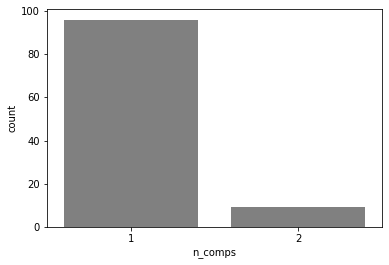

In [18]:
sns.countplot(x='n_comps', data=prin_compsBC[prin_compsBC['Var_Expl']==.5], color='gray')

#### Since the PCA is being performed on panel data, the particular values aren't really trustworthy but I binned them into a histogram to help me better understand the variability that I would expect to see for 75% variance explained.

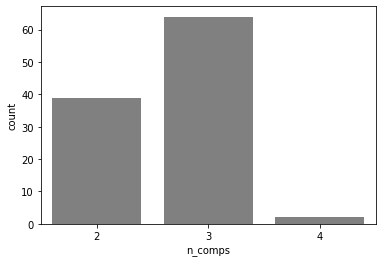

In [19]:
sns.countplot(x='n_comps', data=prin_compsBC[prin_compsBC['Var_Expl']==.75], color='gray')

#### Since the PCA is being performed on panel data, the particular values aren't really trustworthy but I binned them into a histogram to help me better understand the variability that I would expect to see for 90% variance explained.

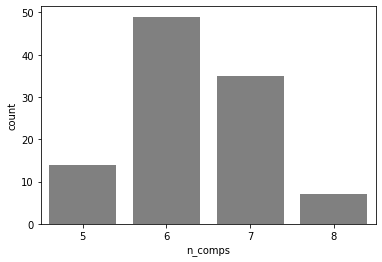

In [22]:
sns.countplot(x='n_comps', data=prin_compsBC[prin_compsBC['Var_Expl']==.9], color='gray')

#### Combination plot

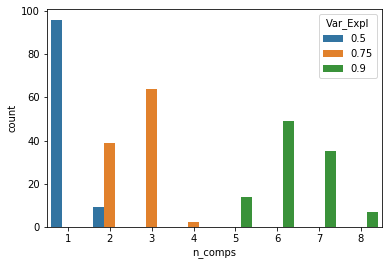

In [23]:
sns.countplot(x='n_comps', data=prin_compsBC, hue='Var_Expl')

#### This is the same basic idea as above except instead of breaking the data down by country, I did a cross section of all countries in a given year.

In [25]:
prin_compsBY=pd.DataFrame()
for x in full['Year'].unique():
    for y in [.5, .75, .9]:
        df=full[full['Year']==x]
        a=df.iloc[:,5:]
        b=df.loc[:,["Year", 'CountryName']].values
        a=StandardScaler().fit_transform(a)
        pca=PCA(y)
        comps=pca.fit_transform(a)
        #print(x, y, pca.n_components_)
        prin_compsBY=prin_compsBY.append(pd.DataFrame([[x, y, int(pca.n_components_)]], columns=['CountryCode', 'Var_Expl', 'n_comps']))

#### Per year for all countries at 50% variance explained

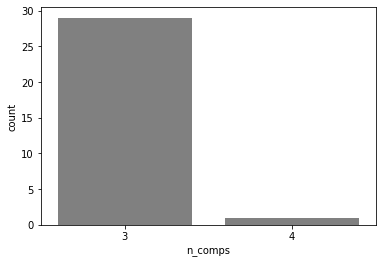

In [26]:
sns.countplot(x='n_comps', data=prin_compsBY[prin_compsBY['Var_Expl']==.5], color='gray')

#### Per year for all countries at 75% variance explained

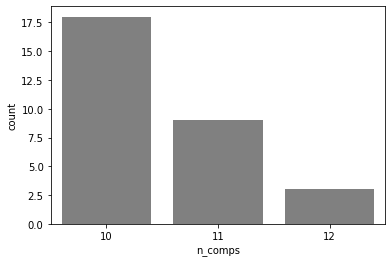

In [27]:
sns.countplot(x='n_comps', data=prin_compsBY[prin_compsBY['Var_Expl']==.75], color='gray')

#### Per year for all countries at 90% variance explained

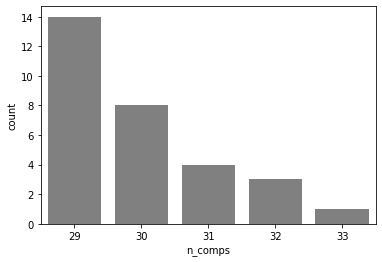

In [28]:
sns.countplot(x='n_comps', data=prin_compsBY[prin_compsBY['Var_Expl']==.9], color='gray')

#### Combination plot

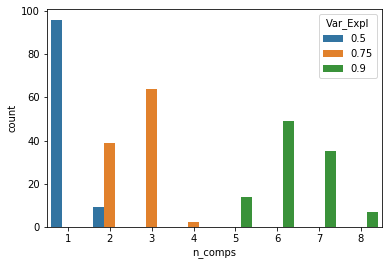

In [29]:
sns.countplot(x='n_comps', data=prin_compsBC, hue='Var_Expl')

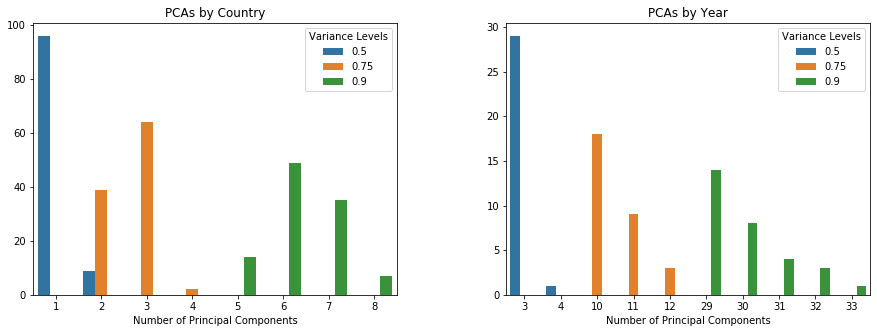

In [30]:
fig = plt.figure(figsize=(15,5*1)) #Setting a variable height based on the number of rows needed
fig.subplots_adjust(hspace=.5, wspace=0.3) 

ax = fig.add_subplot(121)
sns.countplot(x='n_comps', data=prin_compsBC, hue='Var_Expl').set(xlabel='Number of Principal Components', ylabel='', title='PCAs by Country')
plt.legend(title='Variance Levels')
ax = fig.add_subplot(122)
sns.countplot(x='n_comps', data=prin_compsBY, hue='Var_Expl').set(xlabel='Number of Principal Components', ylabel='', title='PCAs by Year')

plt.legend(title='Variance Levels')
#plt.show()
plt.savefig('PCAs.png')

In [32]:
prin_compsBCont=pd.DataFrame()
for x in full['Continent'].unique():
    for y in [.5, .75, .9]:
        df=full[full['Continent']==x]
        a=df.iloc[:,5:]
        b=df.loc[:,["Year", 'Continent']].values

        a=StandardScaler().fit_transform(a)
        pca=PCA(y)
        comps=pca.fit_transform(a)
        #print(x, y, pca.n_components_)
        prin_compsBCont=prin_compsBCont.append(pd.DataFrame([[x, y, int(pca.n_components_)]], columns=['Continent', 'Var_Expl', 'n_comps']))

In [33]:
prin_compsBCont

,Continent,Var_Expl,n_comps
0,Europe,0.50,3
0,Europe,0.75,12
0,Europe,0.90,37
0,Africa,0.50,3
0,Africa,0.75,12
0,Africa,0.90,38
0,South America,0.50,2
0,South America,0.75,6
0,South America,0.90,17
0,Asia,0.50,3
